In [54]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from baseband import guppi
from cycspec_simulator import guppi_raw, Time, BasebandData, PolynomialPredictor, pspec_numba

%matplotlib notebook

In [48]:
headers, data = guppi_raw.read("B1937+21-40us.raw", use_dask=False)
data = data.squeeze()
data = data[..., 0] + 1j*data[..., 1]
nsamples = data.shape[0]
obsbw = float(headers[0]['OBSBW'])*1e6
t = Time(
    int(headers[0]['STT_IMJD']),
    int(headers[0]['STT_SMJD']),
    float(headers[0]['STT_OFFS']) + np.linspace(0, nsamples/obsbw, nsamples, endpoint=False)
)
data = BasebandData(
    t,
    data[:, 0],
    data[:, 1],
    headers[0]['FD_POLN'],
    obsbw,
    float(headers[0]['OBSFREQ'])*1e6
)

In [55]:
predictor = PolynomialPredictor.from_file("polyco-B1937+21-60000.dat")
pspec = pspec_numba(data, 512, 1024, predictor)

<IPython.core.display.Javascript object>


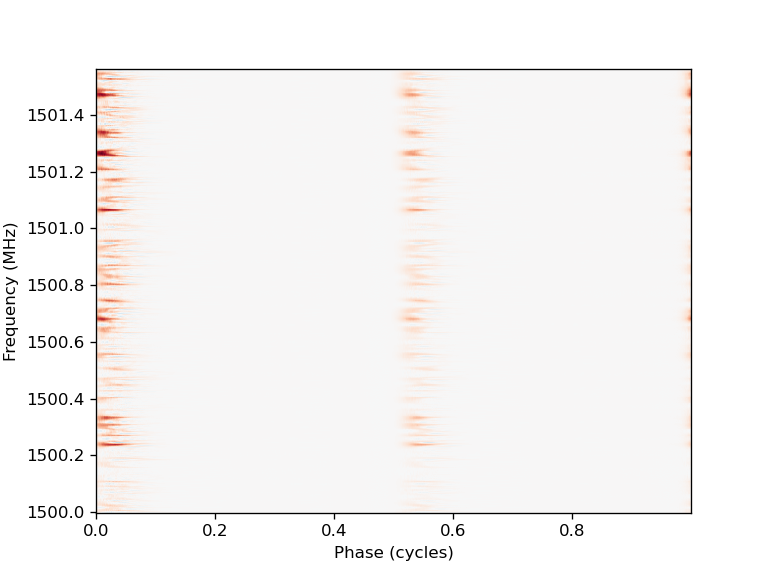

In [61]:
pspec.plot(cmap='RdBu_r', sym_lim=True)
plt.show()

<IPython.core.display.Javascript object>


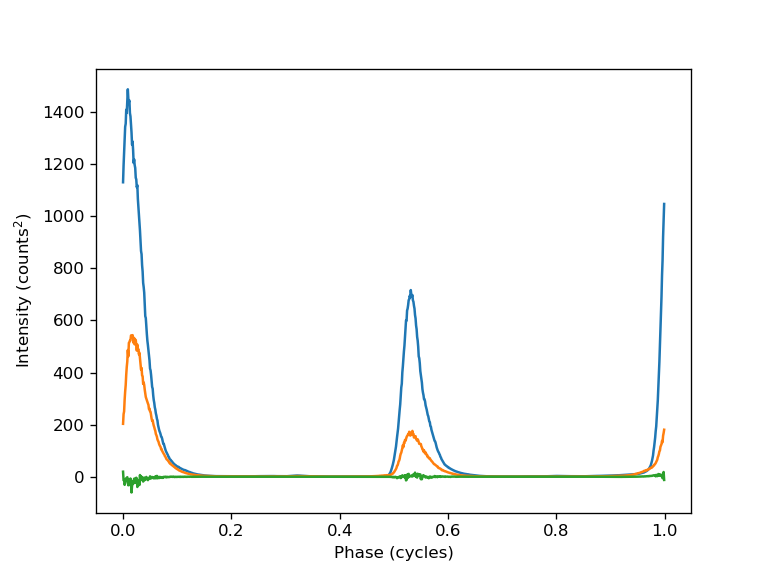

In [67]:
plt.plot(pspec.phase, np.mean(pspec.I, axis=0))
plt.plot(pspec.phase, np.mean(np.sqrt(pspec.Q**2 + pspec.U**2), axis=0))
plt.plot(pspec.phase, np.mean(pspec.V, axis=0))
plt.xlabel('Phase (cycles)')
plt.ylabel('Intensity (counts$^2$)')
plt.show()

In [44]:
nsamples = data.shape[0]
obsbw = headers[0]['OBSBW']*1e6
t = Time(
    headers[0]['STT_IMJD'],
    headers[0]['STT_SMJD'],
    headers[0]['STT_OFFS'] + np.linspace(0, nsamples/obsbw, nsamples, endpoint=False)
)

In [45]:
data.shape[0]

1

In [36]:
BasebandData?

In [3]:
fh = guppi.open('B1937+21-40us.raw')

In [4]:
contents = fh.read()

In [5]:
contents.shape

(4193055, 4)

In [6]:
contents.dtype

dtype('float32')

In [7]:
from blimpy import GuppiRaw

In [19]:
gr = GuppiRaw('B1937+21-40us.raw')

In [14]:
for header, x, y in gr.get_data():
    print(f"x.shape: {x.shape}, x.dtype: {x.dtype}")
    print(f"y.shape: {y.shape}, y.dtype: {y.dtype}")

x.shape: (1, 4193055, 2), x.dtype: int8
y.shape: (1, 4193055, 2), y.dtype: int8

get_data: End of file reached, returning to caller



In [20]:
header, data = gr.read_next_data_block()

In [22]:
data.shape

(1, 4193055, 2)